In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing and Cleaning

In [193]:
def clean_data(dataframe):
    dataframe.drop(columns='Unnamed: 0', inplace=True)
    dataframe['date'] = pd.to_datetime(dataframe['date'])

    return dataframe.head(5)
    

In [194]:
def no_bedrooms(dataframe, df2):
    index=dataframe.loc[dataframe.bedrooms == 0].index.to_list()
    dataframe.drop(dataframe.index[[index]], inplace=True)
    frames= [dataframe, df2]
    dataframe = pd.concat(frames)
    print(dataframe.shape)
    return dataframe

def price_distribution(dataframe):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.hist(dataframe['price'], bins=100);
    ax.set_title('Housing Prices');

In [195]:
training_data = pd.read_csv('/Users/brendanferris/Desktop/kings_county_housing/kc_house_data_train.csv')
missing_vals = pd.read_csv('bedroomsfilled.csv')
holdout_data = pd.read_csv('/Users/brendanferris/Desktop/kings_county_housing/kc_house_data_train.csv')
clean_data(training_data)
clean_data(missing_vals)
training_data = no_bedrooms(training_data, missing_vals)
training_data

(17290, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2954400190,2014-06-24,1295650.0,4,4.50,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8,3980300371,2014-09-26,142000.0,1,0.75,290,20875,1.0,0,0,...,1,290,0,1954,0,98024,47.5308,-121.888,1620,22850
9,2310060040,2014-09-25,240000.0,4,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
10,6896300380,2014-10-02,228000.0,2,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


## Data without price

In [5]:
data_pred = training_data[['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']]

data_pred.head(2)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,2014-08-21,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283


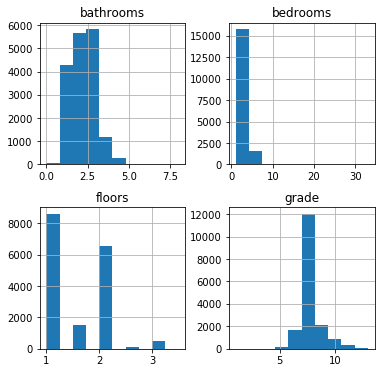

In [6]:
data_pred[['bedrooms', 'floors', 'bathrooms', 'grade']].hist(figsize  = [6, 6]); 

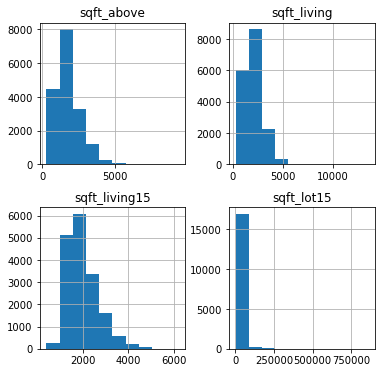

In [7]:
data_pred[['sqft_living15', 'sqft_lot15', 'sqft_above', 'sqft_living']].hist(figsize  = [6, 6]); 

In [8]:
training_data.sort_values('price', ascending=False).head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10366,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
6903,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7519,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
2232,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1979,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
5039,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
14668,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
15816,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
4177,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
14477,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


# All houses with multiple sales

In [9]:
data_pred.loc[data_pred.duplicated(subset='id') == True]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
690,4202400078,2015-04-28,2,1.00,1410,7000,1.0,0,0,3,7,1410,0,1968,0,98055,47.4908,-122.223,1540,6000
1414,3303000130,2015-01-16,3,2.25,1770,7667,1.0,0,0,3,8,1270,500,1966,0,98177,47.7724,-122.362,2180,8103
2044,9211500620,2014-10-08,3,2.25,1740,6650,1.0,0,0,3,7,1240,500,1978,0,98023,47.2979,-122.379,1740,7000
2837,7504021310,2014-05-06,3,2.50,2970,11985,1.0,0,0,3,9,1770,1200,1995,0,98074,47.6359,-122.052,2990,12049
3727,3969300030,2014-07-23,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16764,1250201165,2014-11-21,5,2.50,2000,3600,1.0,0,0,3,6,1150,850,1987,0,98144,47.5971,-122.295,1410,3600
16794,3262300940,2015-02-10,3,1.00,1220,8119,1.0,0,0,4,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
16963,1450100390,2015-03-16,3,1.00,920,7314,1.0,0,0,3,6,920,0,1960,0,98002,47.2892,-122.220,1010,7420
16998,9809000020,2014-05-13,5,2.25,3120,16672,2.0,0,0,4,9,3120,0,1969,0,98004,47.6458,-122.219,3740,17853


# Log normalizing sqft

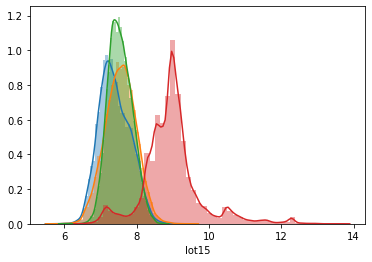

In [10]:
data_log = pd.DataFrame([])
data_log['above'] = np.log(data_pred['sqft_above'])
data_log['living15'] = np.log(data_pred['sqft_living15'])
data_log['lot15'] = np.log(data_pred['sqft_lot15'])
data_log['living'] = np.log(data_pred['sqft_living'])
sns.distplot(data_log['above']);
sns.distplot(data_log['living']);
sns.distplot(data_log['living15']);
sns.distplot(data_log['lot15']);

# Multicollinearity of features

In [11]:
def multicolinear_features(data):
    df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df.set_index(['pairs'], inplace = True)
    df.drop(columns=['level_1', 'level_0'], inplace = True)
    df.columns = ['cc']
    return df[(df.cc>.75) & (df.cc <1)]

In [196]:
multicolinear_features(data_pred)

,cc
pairs,
"(sqft_above, sqft_living)",0.876696
"(sqft_living, sqft_above)",0.876696
"(grade, sqft_living)",0.762929
"(sqft_living, grade)",0.762929
"(grade, sqft_above)",0.758247
"(sqft_above, grade)",0.758247
"(sqft_living, bathrooms)",0.756908
"(bathrooms, sqft_living)",0.756908
"(sqft_living, sqft_living15)",0.755066


# Checking relationships between features and target (price)

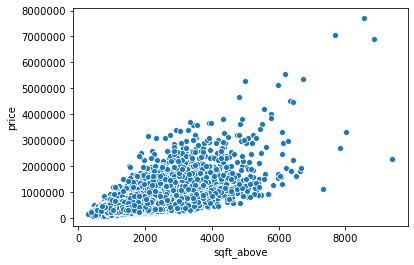

In [13]:
prices = training_data['price']
feature = training_data['sqft_above']
sns.scatterplot(feature, prices)

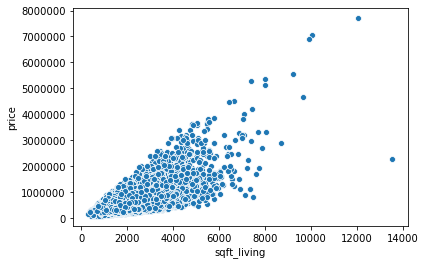

In [14]:
prices = training_data['price']
feature = training_data['sqft_living']
sns.scatterplot(feature, prices)

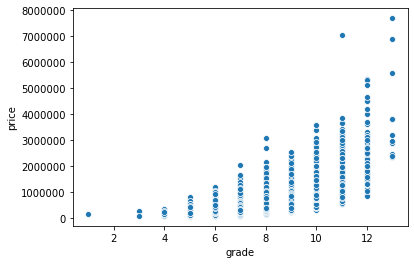

In [15]:
prices = training_data['price']
feature = training_data['grade']
sns.scatterplot(feature, prices)

# Categorical Data

In [142]:
training_data[['zipcode', 'yr_renovated', 'yr_built','bathrooms','waterfront', 'view', 'condition', 'grade']].nunique()

zipcode          70
yr_renovated     69
yr_built        116
bathrooms        30
waterfront        2
view              5
condition         5
grade            12
dtype: int64

In [183]:
yr_built_dummies = pd.get_dummies(training_data['yr_built'], prefix='built', drop_first=True)
waterfront_dummies = pd.get_dummies(training_data['waterfront'], prefix='waterf', drop_first=True)
view_dummies = pd.get_dummies(training_data['view'], prefix='has_view', drop_first=True)
condition_dummies = pd.get_dummies(training_data['condition'], prefix='condition', drop_first=True)
grade_dummies = pd.get_dummies(training_data['grade'], prefix='grade', drop_first=True)
zip_dummies = pd.get_dummies(training_data['zipcode'], prefix='zip', drop_first=True)

training_data = training_data.drop(['zipcode','yr_built','waterfront', 'view', 'condition', 'grade'], axis=1)
training_data = pd.concat([training_data, zip_dummies, yr_built_dummies, waterfront_dummies, view_dummies, condition_dummies, grade_dummies], axis=1)
training_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,2070,0,...,0,0,0,0,1,0,0,0,0,0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,1830,1070,...,0,0,0,0,1,0,0,0,0,0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,3770,0,...,0,0,0,0,0,0,0,1,0,0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,4560,0,...,0,0,0,0,0,0,0,0,1,0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,2550,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2954400190,2014-06-24,1295650.0,4,4.50,4810,28008,2.0,4810,0,...,0,0,0,0,0,0,0,0,1,0
8,3980300371,2014-09-26,142000.0,1,0.75,290,20875,1.0,290,0,...,0,0,0,0,0,0,0,0,0,0
9,2310060040,2014-09-25,240000.0,4,2.50,1810,5669,2.0,1810,0,...,0,0,0,1,0,0,0,0,0,0
10,6896300380,2014-10-02,228000.0,2,1.00,390,5900,1.0,390,0,...,1,0,0,0,0,0,0,0,0,0


In [144]:
training_data.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98092',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_981

# Model

In [121]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [197]:
training_data.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [220]:
train_v1 = training_data[[
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15'
]]

In [215]:
train_v1 = training_data[[
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98092',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199',
 'built_1901',
 'built_1902',
 'built_1903',
 'built_1904',
 'built_1905',
 'built_1906',
 'built_1907',
 'built_1908',
 'built_1909',
 'built_1910',
 'built_1911',
 'built_1912',
 'built_1913',
 'built_1914',
 'built_1915',
 'built_1916',
 'built_1917',
 'built_1918',
 'built_1919',
 'built_1920',
 'built_1921',
 'built_1922',
 'built_1923',
 'built_1924',
 'built_1925',
 'built_1926',
 'built_1927',
 'built_1928',
 'built_1929',
 'built_1930',
 'built_1931',
 'built_1932',
 'built_1933',
 'built_1934',
 'built_1935',
 'built_1936',
 'built_1937',
 'built_1938',
 'built_1939',
 'built_1940',
 'built_1941',
 'built_1942',
 'built_1943',
 'built_1944',
 'built_1945',
 'built_1946',
 'built_1947',
 'built_1948',
 'built_1949',
 'built_1950',
 'built_1951',
 'built_1952',
 'built_1953',
 'built_1954',
 'built_1955',
 'built_1956',
 'built_1957',
 'built_1958',
 'built_1959',
 'built_1960',
 'built_1961',
 'built_1962',
 'built_1963',
 'built_1964',
 'built_1965',
 'built_1966',
 'built_1967',
 'built_1968',
 'built_1969',
 'built_1970',
 'built_1971',
 'built_1972',
 'built_1973',
 'built_1974',
 'built_1975',
 'built_1976',
 'built_1977',
 'built_1978',
 'built_1979',
 'built_1980',
 'built_1981',
 'built_1982',
 'built_1983',
 'built_1984',
 'built_1985',
 'built_1986',
 'built_1987',
 'built_1988',
 'built_1989',
 'built_1990',
 'built_1991',
 'built_1992',
 'built_1993',
 'built_1994',
 'built_1995',
 'built_1996',
 'built_1997',
 'built_1998',
 'built_1999',
 'built_2000',
 'built_2001',
 'built_2002',
 'built_2003',
 'built_2004',
 'built_2005',
 'built_2006',
 'built_2007',
 'built_2008',
 'built_2009',
 'built_2010',
 'built_2011',
 'built_2012',
 'built_2013',
 'built_2014',
 'built_2015',
 'waterf_1',
 'has_view_1',
 'has_view_2',
 'has_view_3',
 'has_view_4',
 'condition_2',
 'condition_4',
 'condition_5',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13']]
train_v1

KeyError: "['built_1943', 'zip_98019', 'built_2002', 'zip_98056', 'grade_3', 'waterf_1', 'zip_98077', 'zip_98122', 'zip_98136', 'built_1922', 'built_1962', 'built_1950', 'zip_98059', 'zip_98038', 'built_1963', 'built_2006', 'zip_98126', 'grade_12', 'built_1947', 'zip_98148', 'built_1944', 'built_1904', 'grade_4', 'zip_98010', 'has_view_2', 'zip_98031', 'grade_7', 'built_1927', 'zip_98074', 'built_1945', 'zip_98146', 'zip_98155', 'built_1937', 'has_view_4', 'built_1996', 'built_1987', 'zip_98033', 'built_1934', 'built_1938', 'built_2004', 'built_1961', 'grade_5', 'zip_98188', 'built_2015', 'grade_11', 'built_2010', 'grade_8', 'zip_98045', 'zip_98118', 'zip_98002', 'zip_98006', 'zip_98115', 'built_1936', 'zip_98032', 'built_1951', 'zip_98027', 'zip_98102', 'built_1940', 'built_1974', 'zip_98003', 'zip_98103', 'built_1912', 'built_1989', 'built_1932', 'built_1998', 'built_2013', 'built_1907', 'condition_4', 'zip_98092', 'built_2008', 'zip_98058', 'built_2001', 'zip_98014', 'built_1926', 'built_1946', 'built_1954', 'zip_98007', 'zip_98024', 'built_1970', 'zip_98023', 'built_1948', 'built_1967', 'zip_98040', 'built_1906', 'built_2000', 'built_1975', 'built_1910', 'built_1953', 'built_1971', 'built_1942', 'built_1992', 'built_1958', 'built_1986', 'built_1985', 'built_1924', 'zip_98133', 'built_1919', 'built_1905', 'built_1955', 'built_1913', 'built_1920', 'zip_98178', 'built_2009', 'zip_98030', 'zip_98070', 'built_1960', 'built_2011', 'built_1964', 'built_1976', 'built_1918', 'zip_98144', 'has_view_3', 'zip_98042', 'built_1979', 'zip_98117', 'built_1984', 'built_1914', 'built_1999', 'built_1981', 'built_1901', 'built_1931', 'zip_98109', 'built_1965', 'built_1980', 'built_1939', 'built_2003', 'grade_13', 'built_1930', 'zip_98065', 'built_1941', 'built_1903', 'built_2005', 'zip_98011', 'zip_98108', 'zip_98039', 'zip_98112', 'built_1933', 'built_1935', 'built_1957', 'built_1973', 'zip_98053', 'built_1994', 'built_1925', 'built_1949', 'built_1916', 'grade_9', 'built_1921', 'zip_98168', 'built_1982', 'condition_5', 'zip_98119', 'zip_98166', 'zip_98105', 'grade_10', 'built_1995', 'built_1969', 'built_1909', 'built_1923', 'zip_98034', 'zip_98198', 'zip_98107', 'built_1902', 'built_1928', 'built_1990', 'zip_98022', 'zip_98055', 'built_1929', 'built_1956', 'built_2012', 'zip_98052', 'zip_98075', 'zip_98028', 'built_1968', 'zip_98072', 'condition_2', 'grade_6', 'zip_98177', 'built_1911', 'zip_98199', 'built_1991', 'zip_98005', 'built_1972', 'built_1993', 'built_1997', 'built_2007', 'built_2014', 'built_1915', 'built_1966', 'built_1988', 'zip_98106', 'built_1952', 'zip_98008', 'built_1908', 'zip_98125', 'zip_98116', 'built_1917', 'zip_98004', 'built_1977', 'built_1978', 'built_1983', 'built_1959', 'zip_98029', 'has_view_1'] not in index"

In [221]:
training_data['sqft_above'] = np.log(data_pred['sqft_above'])
training_data['sqft_living15'] = np.log(data_pred['sqft_living15'])
training_data['sqft_lot15'] = np.log(data_pred['sqft_lot15'])
training_data['sqft_living'] = np.log(data_pred['sqft_living'])
training_data['sqft_lot'] = np.log(data_pred['sqft_lot'])

In [217]:
#min/max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

beds = training_data['bedrooms']
beds_max = max(training_data['bedrooms'])
beds_min = min(training_data['bedrooms'])
baths = training_data['bathrooms']
baths_max = max(training_data['bathrooms'])
baths_min = min(training_data['bathrooms'])

train_v1['bedrooms'] = (beds - beds_min)/(beds_max-beds_min)
train_v1['bathrooms'] = (baths - baths_min)/(baths_max-baths_min)

train_v1[['sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot']] = scaler.fit_transform(train_v1[['sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot']])            

In [218]:
train_v1

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,365000.0,0.09375,0.28125,0.344364,2.0,0,0,4,0.564834,0.000000,1986,0,98058,47.4388,-122.162,0.652137,8.948976
1,865000.0,0.12500,0.37500,0.309388,1.0,0,0,5,0.529419,0.221992,1977,0,98115,47.6784,-122.285,0.649076,8.745603
2,1038000.0,0.09375,0.31250,0.369823,2.0,0,2,3,0.737129,0.000000,1997,0,98006,47.5646,-122.129,0.812336,9.178334
3,1490000.0,0.06250,0.43750,0.406651,2.0,0,2,3,0.791804,0.000000,1990,0,98034,47.6995,-122.228,0.844280,9.562827
4,711000.0,0.06250,0.31250,0.281196,2.0,0,0,3,0.624767,0.000000,2004,0,98052,47.6647,-122.083,0.630147,8.306472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1295650.0,0.09375,0.56250,0.488344,2.0,0,0,3,0.807143,0.000000,1990,0,98053,47.6642,-122.069,0.901593,10.464845
8,142000.0,0.00000,0.09375,0.451454,1.0,0,0,1,0.000000,0.000000,1954,0,98024,47.5308,-121.888,0.510471,10.036706
9,240000.0,0.09375,0.31250,0.287856,2.0,0,0,3,0.526261,0.000000,2003,0,98038,47.3493,-122.053,0.550873,8.645586
10,228000.0,0.03125,0.12500,0.292869,1.0,0,0,2,0.085142,0.000000,1953,0,98118,47.5260,-122.261,0.616958,8.699515


In [219]:
multicolinear_features(train_v1)

,cc
pairs,
"(sqft_lot15, sqft_lot)",0.918382
"(sqft_lot, sqft_lot15)",0.918382


# Train Test Split

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

y = train_v1.price
x = train_v1.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.2)
x_train.shape, x_test.shape

((13832, 18), (3458, 18))

# Sklearn

In [212]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
MSE = mean_squared_error(y_test, y_hat)
np.sqrt(MSE)

209321.73390982303

In [213]:
np.mean(cross_val_score(estimator=lr, X=x_train, y=y_train, cv=30))

0.6951624380933067

# Statsmodels 

In [161]:
outcome = 'price'
predictors = train_v1.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [162]:
model = ols(formula= formula, data=train_v1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     396.6
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:06:22   Log-Likelihood:            -2.3095e+05
No. Observations:               17290   AIC:                         4.623e+05
Df Residuals:                   17076   BIC:                         4.640e+05
Df Model:                         213                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.426e+07    6.6e+06     -6.709      0.000   -5.72e+07   -3.13e+07
bedrooms      -3.035e+05   5.46e+04     -5.561      0.000    -4.1e+05   -1.96e+05
bathrooms      2.843e+05   2.31e+04     12.308      0.000    2.39e+05     3.3e+05
sqft_lot       2.464e+05   1.69e+04     14.543      0.000    2.13e+05     2.8e+05
floors        -2.413e+04   3809.039     -6.336      0.000   -3.16e+04   -1.67e+04
sqft_above     8.505e+05   2.32e+04     36.730      0.000    8.05e+05    8.96e+05
sqft_basement  4.661e+05   1.84e+04     25.278      0.000     4.3e+05    5.02e+05
yr_renovated     24.6818      3.236      7.628      0.000      18.340      31.024
lat            2.453e+05   6.82e+04      3.599      0.000    1.12e+05    3.79e+05
long           -2.66e+05   4.88e+04     -5.445      0.000   -3.62e+05    -1.7e+05
sqft_living15  8.098e+04   1.76e+04      4.610      0.000    4.66e+04    1.15e+05
zip_98002       2.76e+04   1.58e+04      1.751      0.080   -3300.051    5.85e+04
zip_98003     -4495.2473    1.4e+04     -0.322      0.748   -3.19e+04    2.29e+04
zip_98004      7.368e+05   2.55e+04     28.941      0.000    6.87e+05    7.87e+05
zip_98005       2.57e+05   2.69e+04      9.554      0.000    2.04e+05     3.1e+05
zip_98006       2.38e+05   2.22e+04     10.741      0.000    1.95e+05    2.81e+05
zip_98007      2.316e+05   2.77e+04      8.370      0.000    1.77e+05    2.86e+05
zip_98008      2.478e+05   2.65e+04      9.347      0.000    1.96e+05       3e+05
zip_98010      1.187e+05   2.42e+04      4.912      0.000    7.13e+04    1.66e+05
zip_98011      6.042e+04   3.44e+04      1.758      0.079   -6936.564    1.28e+05
zip_98014      1.191e+05   3.77e+04      3.159      0.002    4.52e+04    1.93e+05
zip_98019      7.026e+04   3.73e+04      1.885      0.059   -2796.269    1.43e+05
zip_98022      7.981e+04   2.06e+04      3.871      0.000    3.94e+04     1.2e+05
zip_98023     -3.495e+04   1.28e+04     -2.727      0.006   -6.01e+04   -9826.114
zip_98024      1.957e+05   3.32e+04      5.897      0.000    1.31e+05    2.61e+05
zip_98027      1.768e+05   2.27e+04      7.790      0.000    1.32e+05    2.21e+05
zip_98028      4.013e+04   3.35e+04      1.197      0.231   -2.56e+04    1.06e+05
zip_98029      2.468e+05    2.6e+04      9.478      0.000    1.96e+05    2.98e+05
zip_98030      1.293e+04   1.55e+04      0.837      0.403   -1.74e+04    4.32e+04
zip_98031      2.609e+04   1.61e+04      1.620      0.105   -5468.114    5.76e+04
zip_98032      5693.4267   1.84e+04      0.310      0.757   -3.03e+04    4.17e+04
zip_98033      2.992e+05   2.87e+04     10.417      0.000    2.43e+05    3.56e+05
zip_98034      1.292e+05   3.08e+04      4.195      0.000    6.88e+04     1.9e+05
zip_98038       8.36e+04   1.73e+04      4.829      0.000    4.97e+04    1.18e+05
zip_98039      1.178e+06   3.38e+04     34.817   